# Signal amplification

In [6]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

cmap = plt.get_cmap('tab20c')

datadir = '../../dataset/signal/amplification'
figuredir = '../../figure/signal/amplification'

os.makedirs(figuredir, exist_ok=True)

In [2]:
duration = 30e-3
delays = np.linspace(0, duration, 300)

We are interested in the signal amplitude in dependence of the frequency. Thus we will do a FFT on each segment to identify the dominant frequency and take the maximum voltage as amplitude. Then we compare the different configuration.

In [3]:
runs = {
    'horizontal': {},
    'vertical': {},
}

for run, frames in runs.items():
    for d in delays:
        frames[d] = pd.read_hdf(os.path.join(datadir, f'{run}.h5'), f'{d:.4}')

In [4]:
import transform

f_h = []
f_v = []
A_h = []
A_v = []

for t, df in runs['horizontal'].items():
    f, P = transform.fft(df.time, df.voltage)
        
    f_h.append(f[P.argmax()])
    A_h.append(df.voltage.max())
    
for t, df in runs['vertical'].items():
    f, P = transform.fft(df.time, df.voltage)
        
    f_v.append(f[P.argmax()])
    A_v.append(df.voltage.max())
    
f_h = np.array(f_h)
A_h = np.array(A_h)
f_v = np.array(f_v)
A_v = np.array(A_v)

In [5]:
samp_h = pd.read_hdf(os.path.join(datadir, 'sampled.h5'), 'horizontal')
samp_v = pd.read_hdf(os.path.join(datadir, 'sampled.h5'), 'vertical')

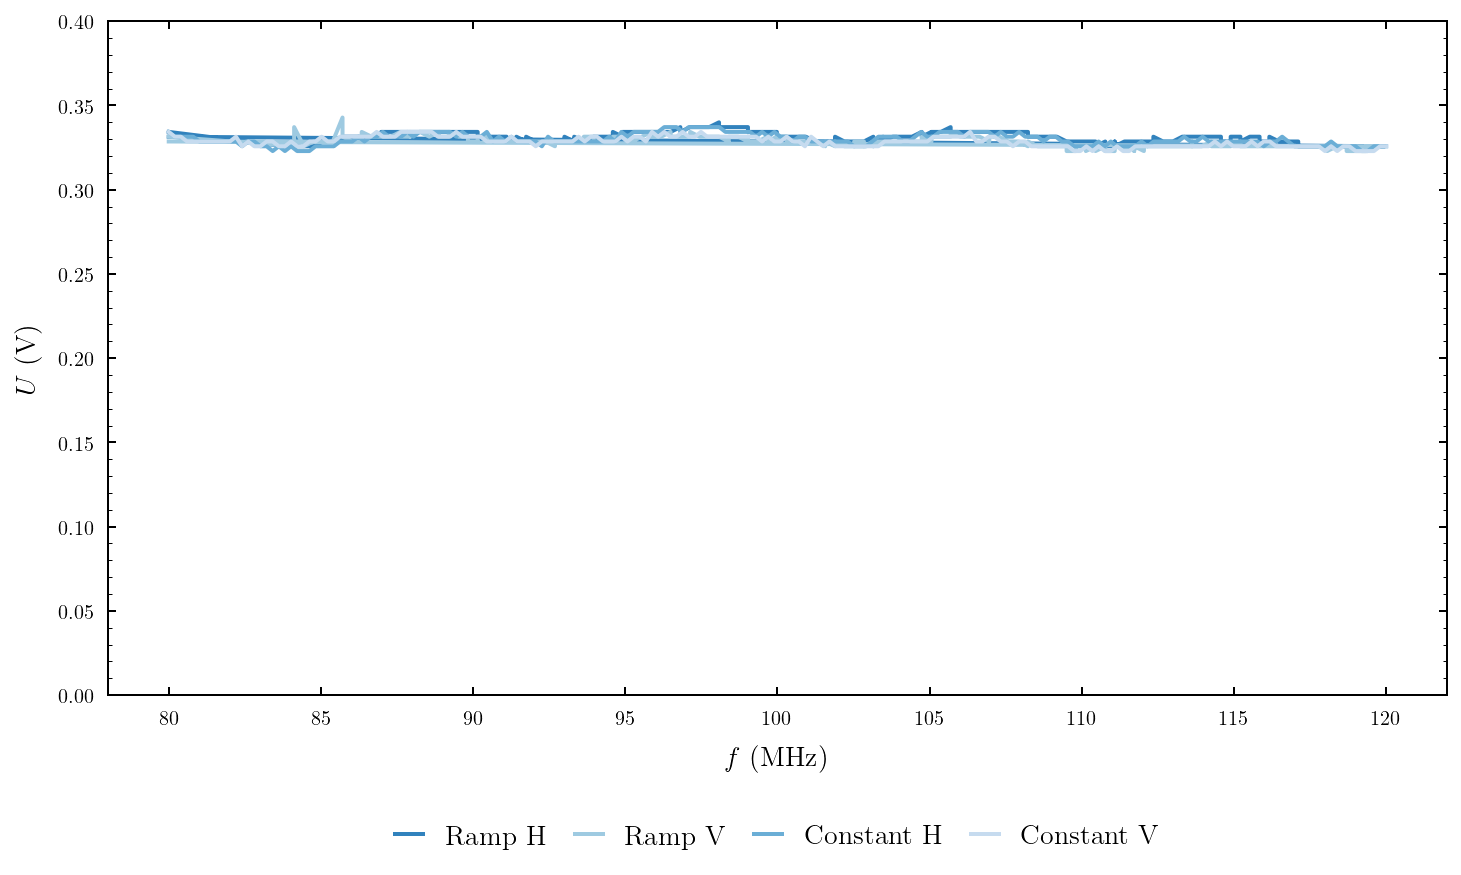

In [12]:
plt.figure(figsize=(12, 6))
plt.xlabel('$f$ (\si{\mega\hertz})')
plt.ylabel('$U$ (V)')

plt.plot(f_h[f_h > 0] / 1e6, A_h[f_h > 0], label='Ramp H', color=cmap.colors[0])
plt.plot(f_v[f_v > 0] / 1e6, A_v[f_v > 0], label='Ramp V', color=cmap.colors[2])
plt.plot(samp_h.frequency / 1e6, samp_h.amplitude, label='Constant H', color=cmap.colors[1])
plt.plot(samp_v.frequency / 1e6, samp_v.amplitude, label='Constant V', color=cmap.colors[3])
plt.ylim(0, .4)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.subplots_adjust(top=.98, bottom=.20)
plt.savefig(os.path.join(figuredir, 'response.pdf'))
plt.savefig(os.path.join(figuredir, 'response.pgf'))
plt.show()

In [8]:
dfh = pd.read_csv(os.path.join(datadir, 'hlog.csv'), skiprows=3, names=['frequency', 'transmission'], header=None, usecols=[0, 1])
dfv = pd.read_csv(os.path.join(datadir, 'vlog.csv'), skiprows=3, names=['frequency', 'transmission'], header=None, usecols=[0, 1])

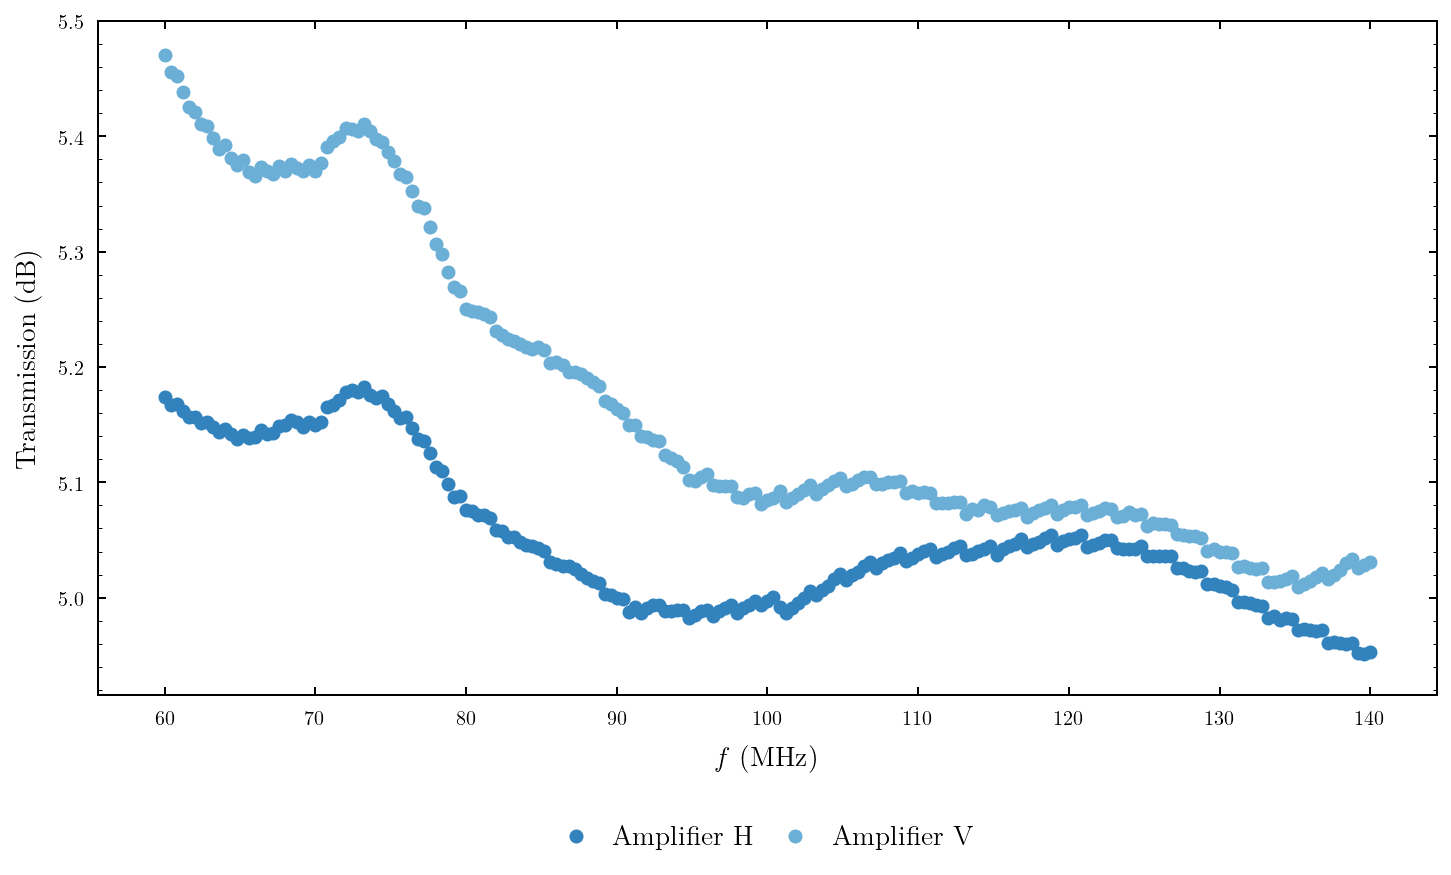

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(dfh.frequency / 1e6, dfh.transmission, label='Amplifier H', color=cmap.colors[0])
plt.scatter(dfv.frequency / 1e6, dfv.transmission, label='Amplifier V', color=cmap.colors[1])
plt.xlabel('$f$ (\si{\mega\hertz})')
plt.ylabel('Transmission (\si{\decibel})')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.subplots_adjust(top=.98, bottom=.20)
plt.savefig(os.path.join(figuredir, 'transmission.pdf'))
plt.savefig(os.path.join(figuredir, 'transmission.pgf'))
plt.show()